# ***Hand Tracking*** 

Hand tracking is a computer vision and machine learning technique used to locate and track the position and movement of human hands within a video stream or image. The principle behind hand tracking involves a combination of image processing, feature extraction, and machine learning to detect and follow the hands' keypoints and gestures. Here are the key principles and steps involved in hand tracking:

1. **Input**: Hand tracking starts with a video stream or image containing one or more human hands. This input can come from a camera, webcam, or any other video source.

2. **Preprocessing**: The input frames may undergo preprocessing steps to improve the quality of the image and reduce noise. Common preprocessing steps include noise reduction, image resizing, and color space conversion.

3. **Hand Detection**: The primary objective is to locate the presence of hands in each frame of the video. Hand detection typically involves using deep learning models, such as convolutional neural networks (CNNs) or single-shot multi-box detectors (SSD), which have been trained to recognize hand-like features.

4. **Hand Keypoint Estimation**: Once hands are detected, the next step is to estimate the keypoints or landmarks on each hand. These keypoints correspond to specific locations on the hand, such as the fingertips, palm center, and knuckles. Keypoint estimation is often performed using neural networks, such as convolutional pose machines (CPMs) or other pose estimation models.

5. **Hand Tracking**: After detecting and estimating keypoints in the first frame, hand tracking involves continuously following the movement of the hands across subsequent frames. This is achieved by associating keypoints from the previous frame with those in the current frame, typically using methods like the Kanade-Lucas-Tomasi (KLT) tracking algorithm or matching keypoints based on their proximity.

6. **Gesture Recognition**: Hand tracking systems can also incorporate gesture recognition to identify specific hand movements or poses. This step may involve training machine learning models to recognize predefined gestures, such as a thumbs-up, peace sign, or open palm.

7. **Output**: The output of the hand tracking system includes information about the position, movement, and gestures of the detected hands. This data can be used for various applications, including virtual reality, augmented reality, sign language recognition, human-computer interaction, and more.

8. **Performance Optimization**: Hand tracking systems often require optimization to run in real-time with low latency. Optimization techniques may include model quantization, parallel processing, and hardware acceleration using GPUs or specialized AI chips.

9. **Robustness**: To make hand tracking systems practical, they must be robust to factors like changes in lighting conditions, hand occlusions, and variations in hand appearance (e.g., different skin tones and accessories).

10. **Integration**: Finally, hand tracking systems can be integrated into applications and devices, allowing users to interact with digital interfaces, control devices, or manipulate objects in a natural and intuitive way.

Overall, hand tracking is a crucial technology for enabling natural and gesture-based interactions in various fields, from gaming and entertainment to healthcare and robotics. It continues to advance with improvements in machine learning techniques and hardware, making it more accurate and accessible for a wide range of applications.

## What is MediaPipe ?

MediaPipe is an open-source framework developed by Google that provides tools and solutions for building applications involving perception and machine learning tasks using computer vision. It is designed to make it easier for developers to create applications that process and analyze visual data, such as images and videos, in real-time.

MediaPipe offers a set of pre-trained machine learning models and a flexible pipeline for building applications that can perform tasks like:

1. **Face Detection:** Identifying and tracking faces within images and videos.
2. **Hand Tracking:** Tracking and recognizing hand gestures and movements.
3. **Pose Estimation:** Estimating the skeletal structure of a human body or objects within images or video streams.
4. **Object Detection and Tracking:** Detecting and tracking objects within a video stream.
5. **Facial Landmark Detection:** Identifying and tracking specific points on a person's face, such as the eyes, nose, and mouth.

MediaPipe provides a range of pre-built components and APIs that developers can use to integrate these capabilities into their applications. It's particularly useful for building applications related to augmented reality (AR), virtual reality (VR), gesture recognition, and more.

Developers can leverage the power of machine learning without having to build models from scratch, making it accessible for a wide range of computer vision applications. MediaPipe supports various platforms, including Android, iOS, Windows, Linux, and macOS, making it a versatile tool for developers working on different platforms.

Keep in mind that the capabilities and features of MediaPipe may have evolved since my last knowledge update in September 2021, so I recommend checking the official MediaPipe website or documentation for the most up-to-date information and resources.

## What is OpenCV ?

OpenCV, which stands for "Open Source Computer Vision Library," is an open-source computer vision and machine learning software library. It provides a comprehensive set of tools and functions for a wide range of computer vision tasks, including image and video analysis, image processing, object detection and recognition, face detection, augmented reality, and more.

Here are some key features and components of OpenCV:

1. **Image Processing**: OpenCV offers a rich set of functions for basic image processing tasks, such as filtering, blurring, resizing, and transforming images.

2. **Feature Detection and Description**: It provides algorithms for detecting and describing features in images, which is essential for tasks like object recognition and tracking.

3. **Object Detection and Tracking**: OpenCV includes various techniques and pre-trained models for detecting and tracking objects within images and video streams.

4. **Machine Learning**: OpenCV integrates with machine learning libraries like scikit-learn and provides tools for training and using machine learning models for tasks like classification and regression.

5. **Camera Calibration**: It supports camera calibration, which is crucial for computer vision applications like 3D reconstruction and augmented reality.

6. **Deep Learning**: OpenCV has integrated support for deep learning frameworks like TensorFlow and PyTorch, allowing you to use pre-trained deep neural networks for various tasks.

7. **Multi-platform Support**: OpenCV is cross-platform and can be used on various operating systems, including Windows, Linux, macOS, Android, and iOS.

8. **Community and Documentation**: It has a large and active user community, along with extensive documentation, tutorials, and examples, making it easier for developers to get started with computer vision projects.

OpenCV is widely used in academia and industry for a broad spectrum of applications, including robotics, medical imaging, autonomous vehicles, security, and more. Its open-source nature, extensive feature set, and active community support make it a popular choice for computer vision development.

### landmark

MediaPipe's hand tracking model is capable of detecting and tracking various landmarks or keypoints on the hand. The 21 landmarks typically include points on the fingers, palm, and the back of the hand. These landmarks are represented as (x, y, z) coordinates in 3D space, providing detailed information about the hand's position and pose.

The 21 landmarks in MediaPipe's hand tracking model are typically used for tasks like gesture recognition, hand pose estimation, and interactive applications that involve tracking hand movements and gestures.

If you have specific questions or tasks related to hand tracking using MediaPipe's hand tracking model with 21 landmarks, please feel free to ask, and I'll do my best to provide you with more information or assistance.


In [2]:
import cv2
import mediapipe as mp
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')


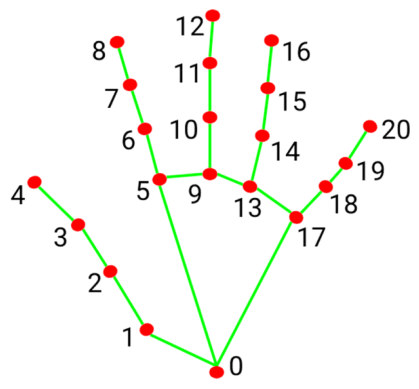

In [7]:
image=cv2.imread('hand_2.png')
image_rgb=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
plt.imshow(image_rgb)
plt.axis('off')
plt.show()

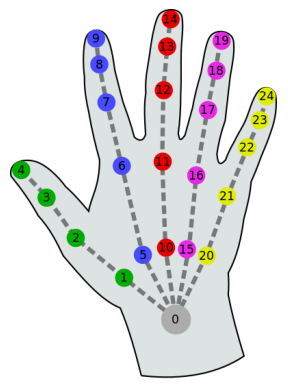

In [8]:
import cairosvg
import matplotlib.pyplot as plt
import io

# Read the SVG file (replace 'your_image.svg' with your SVG file path)
svg_file_path = 'hand.svg'

# Convert the SVG to a PNG image using cairosvg
svg_data = open(svg_file_path, 'rb').read()
png_output = cairosvg.svg2png(bytestring=svg_data)

# Load the PNG image into Matplotlib and display it
img = plt.imread(io.BytesIO(png_output))
plt.imshow(img)
plt.axis('off')  # Turn off axis labels and ticks
plt.show()


In [17]:
import cv2
import mediapipe as mp

# Initialize MediaPipe Hands
mp_hands = mp.solutions.hands
hands = mp_hands.Hands()

# Initialize MediaPipe Drawing
mp_drawing = mp.solutions.drawing_utils
drawing_spec = mp_drawing.DrawingSpec(thickness=2, circle_radius=2)

# Initialize Video Capture (0 is the default camera)
cap = cv2.VideoCapture(0)

while cap.isOpened():
    # Read a frame from the video stream
    ret, frame = cap.read()
    if not ret:
        continue

    # Convert the BGR image to RGB (MediaPipe expects RGB images)
    rgb_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

    # Process the frame to detect hands
    results = hands.process(rgb_frame)

    if results.multi_hand_landmarks:
        for landmarks in results.multi_hand_landmarks:
            # Render landmarks on the frame
            mp_drawing.draw_landmarks(frame, landmarks, mp_hands.HAND_CONNECTIONS, drawing_spec, drawing_spec)

    # Display the frame with hand landmarks
    cv2.imshow('Hand Tracking', frame)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release video capture and close OpenCV windows
cap.release()
cv2.destroyAllWindows()

# Release MediaPipe Hands
hands.close()


In above code:

1. We import the necessary libraries, including OpenCV (`cv2`) and MediaPipe (`mediapipe`).

2. MediaPipe's hand tracking model is initialized using `mp_hands.Hands()`. We also set up drawing utilities for rendering landmarks on the frame.

3. We create a video capture object (`cap`) to capture frames from the default camera (0). You can change the camera index or specify a video file path.

4. Inside the main loop, we read frames from the video capture and convert them from BGR to RGB format (required by MediaPipe).

5. We process each frame using the MediaPipe hand tracking model, which detects hand landmarks.

6. If hand landmarks are detected (`results.multi_hand_landmarks`), we use `mp_drawing.draw_landmarks` to render the landmarks on the frame.

7. The frame with hand landmarks is displayed, and the loop continues until the user presses the 'q' key.

8. After the loop, we release the video capture and close OpenCV windows, ensuring a clean shutdown.

9. Finally, we close the MediaPipe hand tracking model with `hands.close()`.

This code demonstrates a basic hand tracking setup using MediaPipe and OpenCV. You can further extend it to perform hand gesture recognition or integrate it into interactive applications.

## OutPut

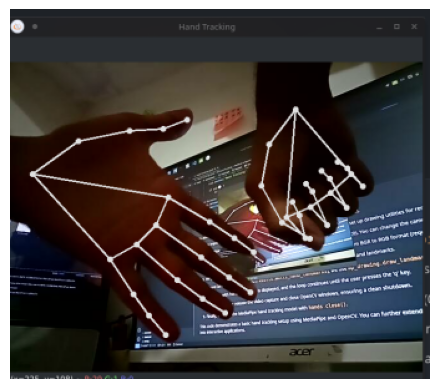

In [18]:
image=cv2.imread('Out.png')
image_rgb=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
plt.imshow(image_rgb)
plt.axis('off')
plt.show()

# **Thank You!**